In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
obs_name = 'NSIDC_0079'
seas_str = 'JJA'
seas_sel = [6,7,8]
thresh_str = '05'
clim_freq_str = 'WEEKLY'
time_period = 'COMMON_REFORECAST'

load obs for ALL DAYS

In [3]:
fpath_load = '/home/disk/sipn/mcmcgraw/McGraw_etal_2020/code/make_it_nice/data/'
fname_obs_all = fpath_load+'OBS_{obs_name}_all_regions_climatology_created_{time_period}.csv'.format(obs_name=obs_name,time_period=time_period)
obs_ALL = pd.read_csv(fname_obs_all)
obs_ALL


,Unnamed: 0,valid date,nregions,region,SIE,valid day of year,SIE clim,SIE anom,valid date month
0,73040,1999-01-01,99,panArctic,14.042518,01-01,13.468947,5.735711e-01,1
1,73041,1999-01-01,2,Sea of Okhotsk,0.755715,01-01,0.548772,2.069425e-01,1
2,73042,1999-01-01,3,Bering,0.567497,01-01,0.560519,6.978299e-03,1
3,73043,1999-01-01,4,Hudson Bay,1.233464,01-01,1.219998,1.346571e-02,1
4,73044,1999-01-01,5,St John,0.030842,01-01,0.043329,-1.248666e-02,1
...,...,...,...,...,...,...,...,...,...
116875,189915,2014-12-31,20,Kara-Laptev Sea,1.791022,12-31,1.779339,1.168325e-02,12
116876,189916,2014-12-31,21,Barents-Kara-Laptev Sea,2.417750,12-31,2.382983,3.476707e-02,12
116877,189917,2014-12-31,22,East Siberian-Beaufort-Chukchi Sea,3.074202,12-31,3.074202,8.881784e-16,12
116878,189918,2014-12-31,23,Atlantic,1.707697,12-31,1.643130,6.456748e-02,12


In [4]:
clim_freq_str = 'WEEKLY'
model_name = 'ecmwf'
fdir = '/home/disk/sipn/mcmcgraw/McGraw_etal_2020/code/make_it_nice/data/{model_name}/COMMON_REFORECAST/'.format(model_name=model_name)
fname_obs_VRILE = fdir+'VRILE_count_SIE_obs_months{seas_str}_VRILE{thresh_str}_model_clim_freq_{clim_freq_str}.csv'.format(
                                             seas_str=seas_str,thresh_str=thresh_str,clim_freq_str=clim_freq_str)
fname_obs_VRILE_anom = fdir+'VRILE_count_SIE_anom_obs_months{seas_str}_VRILE{thresh_str}_model_clim_freq_{clim_freq_str}.csv'.format(
                                             seas_str=seas_str,thresh_str=thresh_str,clim_freq_str=clim_freq_str)
obs_VRILE = pd.read_csv(fname_obs_VRILE)
obs_VRILE_anom = pd.read_csv(fname_obs_VRILE_anom)

Get 5-day changes in SIE for OBS_ALL

In [5]:
nday_change = 5
nday_shift = np.floor(nday_change/2)
obs_shift = pd.DataFrame()
obs_shift['SIE anom -n'] = obs_ALL.groupby(['region'])['SIE anom'].shift(-nday_shift)
obs_shift['SIE anom +n'] = obs_ALL.groupby(['region'])['SIE anom'].shift(+nday_shift)
obs_shift['SIE -n'] = obs_ALL.groupby(['region'])['SIE'].shift(-nday_shift)
obs_shift['SIE +n'] = obs_ALL.groupby(['region'])['SIE'].shift(+nday_shift)
obs_ALL['d_SIE'] = obs_shift['SIE -n'] - obs_shift['SIE +n']
obs_ALL['d_SIE anom'] = obs_shift['SIE anom -n'] - obs_shift['SIE anom +n']

For now focus just on summer.  We'll plot the SIE / change in SIE for each summer and highlight VRILEs

In [6]:
obs_ALL['valid year'] = pd.to_datetime(obs_ALL['valid date']).dt.year
obs_ALL_seas = obs_ALL[obs_ALL['valid date month'].isin(seas_sel)]
obs_ALL_seas = obs_ALL_seas.set_index('region')
#
obs_VRILE['valid year'] = pd.to_datetime(obs_VRILE['valid date']).dt.year
obs_VRILE_seas = obs_VRILE[obs_VRILE['valid date month'].isin(seas_sel)]
obs_VRILE_seas = obs_VRILE_seas.set_index('region')

In [7]:
obs_ALL_seas.head()

,Unnamed: 0,valid date,nregions,SIE,valid day of year,SIE clim,SIE anom,valid date month,d_SIE,d_SIE anom,valid year
region,,,,,,,,,,,
panArctic,76060,1999-06-01,99,13.195185,06-01,12.387121,0.808063,6,-0.206856,-0.023217,1999
Sea of Okhotsk,76061,1999-06-01,2,0.250201,06-01,0.126382,0.123819,6,-0.059500,-0.030705,1999
Bering,76062,1999-06-01,3,0.333426,06-01,0.172324,0.161102,6,-0.097257,-0.049013,1999
Hudson Bay,76063,1999-06-01,4,1.181062,06-01,1.201219,-0.020157,6,-0.021732,-0.010080,1999
St John,76064,1999-06-01,5,0.000000,06-01,0.001312,-0.001312,6,0.000000,0.001661,1999


Select a region and plot

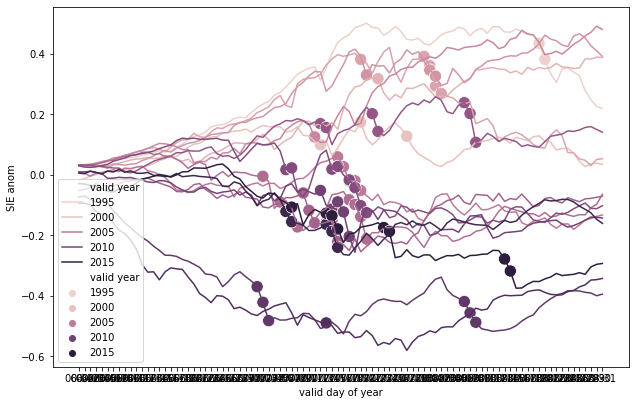

In [8]:
reg_sel = 'Kara-Laptev Sea'
fig1= plt.figure(1,figsize=(8,5))
ax1 = fig1.add_axes([0,0,1,1])
obs_ALL_plt = obs_ALL_seas.loc[reg_sel]
sns.lineplot(data=obs_ALL_plt,x='valid day of year',y='SIE anom',hue='valid year',ax=ax1,linestyle='--')
obs_VRILE_plt = obs_VRILE_seas.loc[reg_sel]
sns.scatterplot(data=obs_VRILE_plt,x='valid day of year',y='SIE anom',hue='valid year',marker='o',s=150,ax=ax1)

In [65]:
obs_VRILE_plt.groupby(['valid year']).count()

,valid date,nregions,SIE,valid day of year,SIE clim,SIE anom,valid date month,SIE anom -n,SIE anom +n,SIE -n,SIE +n,d_SIE,d_SIE anom,p05
valid year,,,,,,,,,,,,,,
1999,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2000,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2001,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2002,5,5,5,5,5,5,5,5,5,5,5,5,5,5
2003,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2004,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2005,5,5,5,5,5,5,5,5,5,5,5,5,5,5
2006,8,8,8,8,8,8,8,8,8,8,8,8,8,8
2007,6,6,6,6,6,6,6,6,6,6,6,6,6,6
